## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [13]:
from pandas_datareader import data as web
import datetime
import yfinance as yf 

In [14]:
yf.pdr_override()

start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2018, 12, 31)

aapl = web.get_data_yahoo('AAPL',start=start,end=end)
aapl

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.133327,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.102955,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.240786,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.544470,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.796764,134247600
...,...,...,...,...,...,...
2018-12-21,39.215000,39.540001,37.407501,37.682499,36.314789,382978400
2018-12-24,37.037498,37.887501,36.647499,36.707500,35.375179,148676800
2018-12-26,37.075001,39.307499,36.680000,39.292500,37.866352,234330000


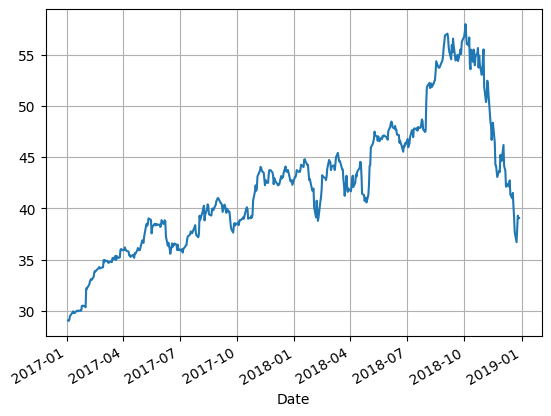

In [15]:
aapl['Close'].plot(grid=True)

plt.show()

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

<AxesSubplot: >

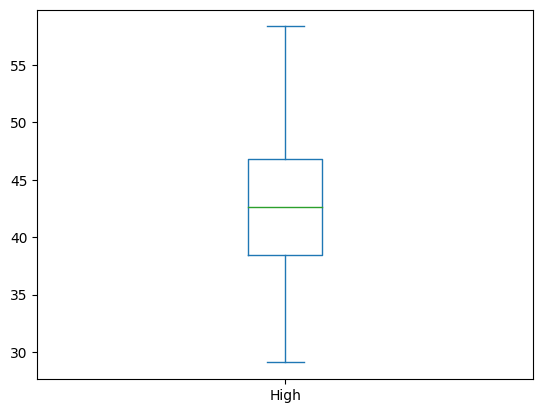

In [20]:
aapl['High'].plot.box()

<AxesSubplot: ylabel='Frequency'>

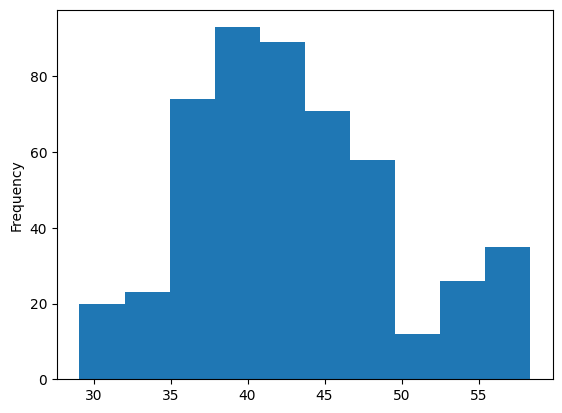

In [25]:
aapl['High'].plot(kind='hist')

В течение двух лет выбросов не было.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [34]:
average_ratings = np.load('./data/average_ratings.npy')
pd.DataFrame(average_ratings)

,0,1,2,3,4,5,6,7,8,9,...,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094
0,5.0,5.013103,5.026240,5.013103,5.000000,4.986932,5.000000,5.013103,5.000000,4.986932,...,5.451021,5.436773,5.451021,5.465305,5.479627,5.493987,5.508384,5.522819,5.537292,5.522819
1,7.0,6.970750,7.000000,6.970750,6.941621,6.970750,7.000000,6.970750,7.000000,7.029373,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
2,3.0,2.996861,2.993725,2.996861,3.000000,2.996861,2.993725,2.996861,2.993725,2.996861,...,2.984338,2.981216,2.984338,2.981216,2.984338,2.987464,2.990593,2.993725,2.990593,2.987464


Text(0.5, 1.0, 'Изменение среднего рейтинга трёх рецептов')

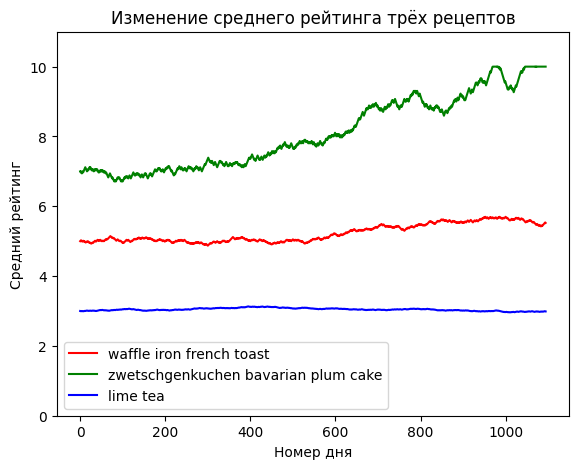

In [99]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

y1_line, = ax.plot(average_ratings[0], 'r', label = 'waffle iron french toast')
y2_line, = ax.plot(average_ratings[1], 'g', label = 'zwetschgenkuchen bavarian plum cake')
y3_line, = ax.plot(average_ratings[2], 'b', label = 'lime tea')

ax.set_ylim([0, 11])

ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')

ax.legend(handles=[y1_line, y2_line, y3_line])

ax.set_title('Изменение среднего рейтинга трёх рецептов')

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


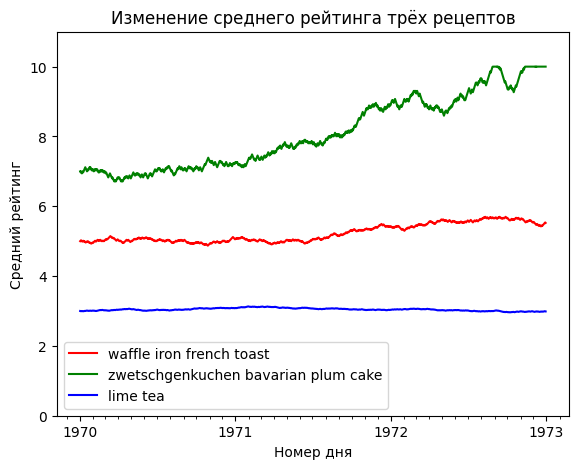

In [96]:
time_range = pd.date_range(start='2019/1/1', end='2021/12/30')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())

ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(time_range))

fig

# не получается года сделать с 2019 по 2021

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

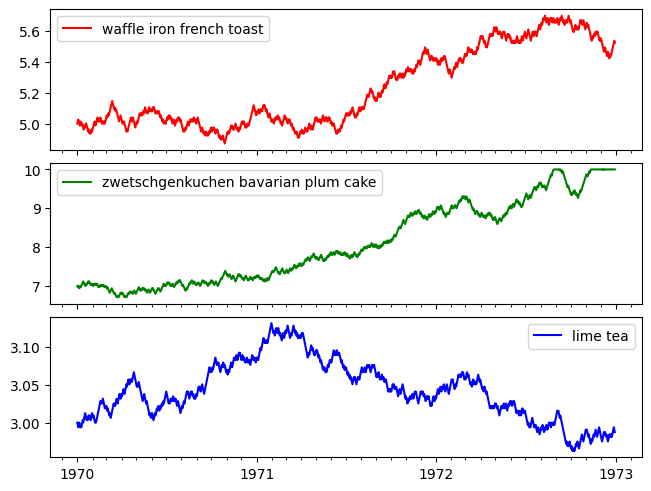

In [114]:
fig, axes = plt.subplots(nrows=3, ncols=1, layout="constrained", sharex=True)

axes[0].plot(average_ratings[0], 'r', label = 'waffle iron french toast')
axes[1].plot(average_ratings[1], 'g', label = 'zwetschgenkuchen bavarian plum cake')
axes[2].plot(average_ratings[2], 'b', label = 'lime tea')

for axi in axes:
    axi.xaxis.set_major_locator(mdates.YearLocator())
    axi.xaxis.set_minor_locator(mdates.MonthLocator())
    axi.legend()

axes[2].xaxis.set_major_formatter(mdates.ConciseDateFormatter(time_range))

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течение первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [259]:
visitors = np.load('./data/visitors.npy')
visitors

array([2311, 2023, 1839, 1523, 1371, 1217, 1098,  958,  862,  724,  654,
        558,  526,  454,  383,  372,  356,  274,  239,  236,  214,  179,
        180,  140,  138,  112,  102,  101,   74,   81,   70,   74,   53,
         57,   52,   44,   38,   30,   37,   27,   20,   21,   16,   16,
         12,    9,   13,   10,   13,    7,    5,    8,    6,    8,    9,
          4,    3,    4,    4,    2,    2,    3,    2,    2,    2,    2,
          2,    3,    2,    2,    3,    2,    2,    2,    2,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2], dtype=int32)

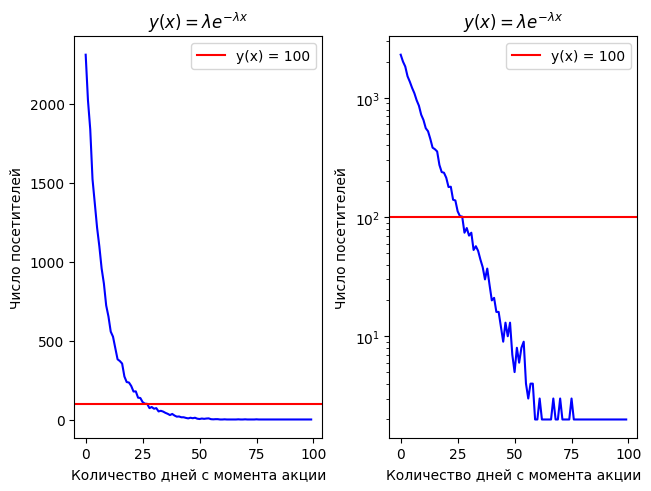

In [136]:
fig, axes = plt.subplots(nrows=1, ncols=2, layout="constrained")

for axi in axes:
    axi.plot(visitors, 'b')
    axi.set_title('$y(x)=\lambda e^{-\lambda x}$')
    axi.axhline(y=100, color='r', linestyle='-', label='y(x) = 100')
    axi.legend()
    axi.set_xlabel('Количество дней с момента акции')
    axi.set_ylabel('Число посетителей')

plt.yscale('log')

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [306]:
recipes = pd.read_csv('./data/recipes_sample.csv', delimiter=',')
reviews = pd.read_csv('./data/reviews_sample.csv', delimiter=',', index_col=0)
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [228]:
short_recipes = recipes[recipes.minutes < 5]
average_recipes = recipes[(recipes.minutes > 5) & (recipes.minutes < 50)]
long_recipes = recipes[recipes.minutes > 50]

groups = ['Короткие рецепты', 'Средние рецепты', 'Длинные рецепты']
count = 0

for recipe in [short_recipes, average_recipes, long_recipes]:
    print(groups[count])
    print('Cреднее количество шагов в рецепте:', recipe.n_steps.mean())
    print('Размер группы:', len(recipe), '\n')
    count += 1

Короткие рецепты
Cреднее количество шагов в рецепте: 4.990430622009569
Размер группы: 675 

Средние рецепты
Cреднее количество шагов в рецепте: 8.929754481683554
Размер группы: 16340 

Длинные рецепты
Cреднее количество шагов в рецепте: 12.03532110091743
Размер группы: 10422 



Text(0.5, 1.0, 'Размеры групп рецептов')

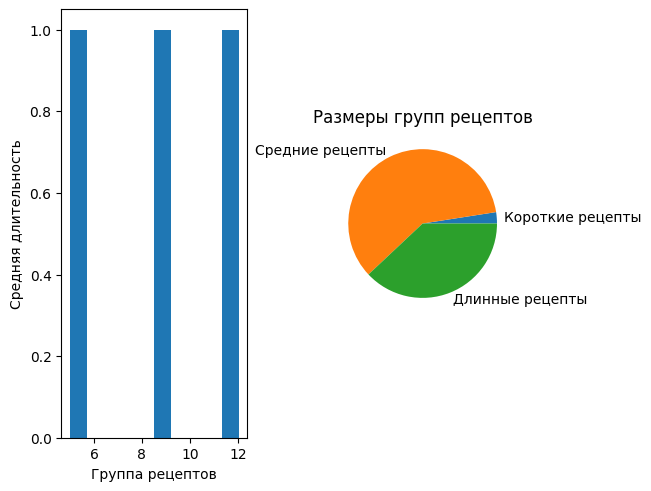

In [232]:
fig, axes = plt.subplots(nrows=1, ncols=2, layout="constrained")

average = pd.Series([short_recipes.n_steps.mean(), average_recipes.n_steps.mean(), long_recipes.n_steps.mean()])
size = pd.Series([len(short_recipes), len(average_recipes), len(long_recipes)])

# axes[0].plot([1, 2, 3], average)
# axes[0].plot(kind='hist')
# axes[1].plot([1, 2, 3], [1, 23, 5])
# axes[1].hist(average)
# axes[0].plot(kind='hist')
# axes[0].plot([1, 2, 3], average)

# size.plot(kind='pie')

axes[0].hist(average)
axes[1].pie(size, labels=groups)

axes[0].set_xlabel('Группа рецептов')
axes[0].set_ylabel('Средняя длительность')

axes[1].set_title('Размеры групп рецептов')

# поменять оси гистограммы

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

Text(0.5, 0.98, 'Гистограммы рейтинга отзывов в 2008 и 2009 годах')

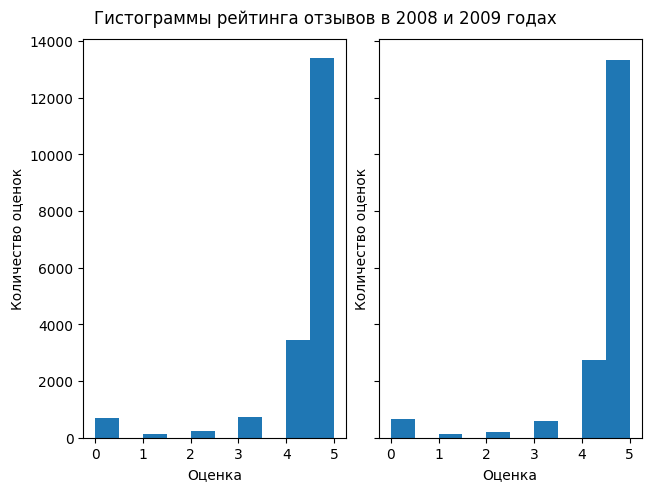

In [269]:
reviews.date = pd.to_datetime(reviews.date)

fig, axes = plt.subplots(nrows=1, ncols=2, layout="constrained", sharey=True)

axes[0].hist(reviews.rating[reviews.date.dt.year == 2008])
axes[1].hist(reviews.rating[reviews.date.dt.year == 2009])

for axi in axes:
    axi.set_xlabel('Оценка')
    axi.set_ylabel('Количество оценок')

plt.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

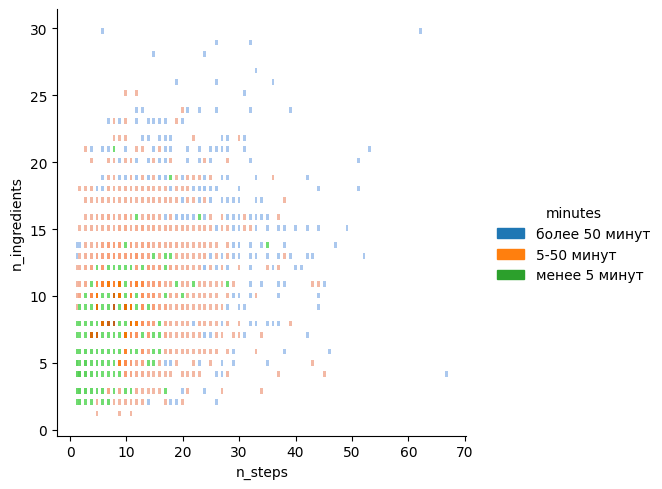

In [302]:
# for i in range(len(recipes.minutes)):
#     if recipes.minutes[i] < 5:
#         recipes.minutes[i] = 'менее 5 минут'
#     elif (recipes.minutes >= 5) and (recipes.minutes < 50):
#         recipes.minutes = '5-50 минут'
#     elif recipes.minutes >= 50:
#         recipes.minutes = 'более 50 минут'

sns.displot(recipes, x='n_steps', y='n_ingredients', hue='minutes')


наблюдается ли зависимость?

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

/var/folders/x_/c8gn0yln5gn3kbdg4w8164t40000gn/T/ipykernel_27383/2734589244.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(recipes_n_reviews.corr(), annot = True, fmt = '.1g', cmap= 'YlOrRd')


Text(0.5, 1.0, 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')

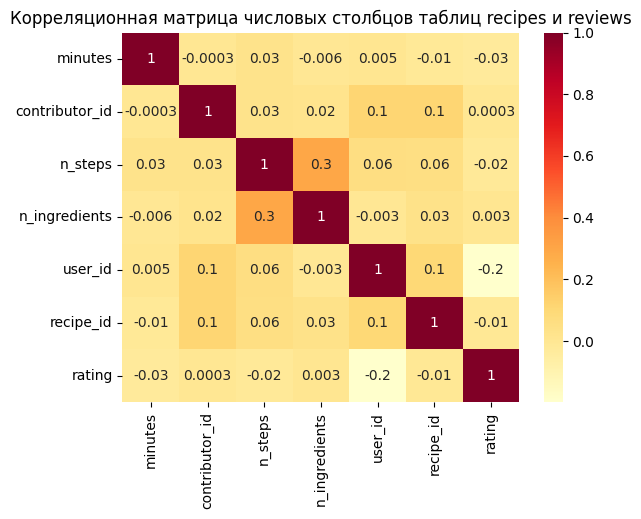

In [322]:
recipes_n_reviews = recipes.merge(reviews, left_on='id', right_on='recipe_id')
recipes_n_reviews = recipes_n_reviews.drop(columns='id')

ax = plt.axes()
sns.heatmap(recipes_n_reviews.corr(), annot = True, fmt = '.1g', cmap= 'YlOrRd')
ax.set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')